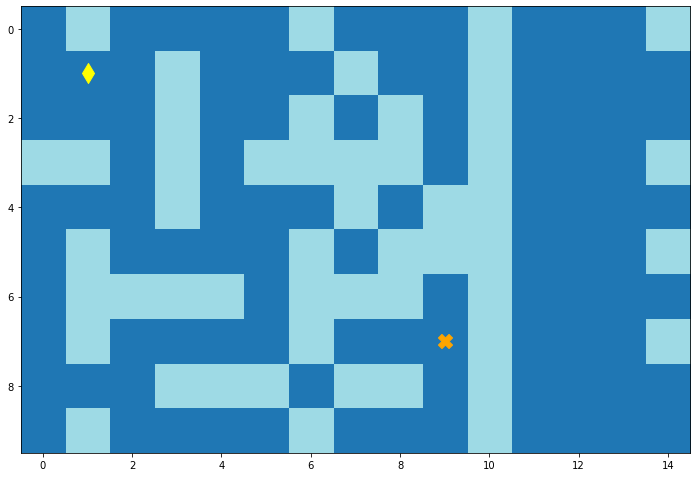

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# ------------------- Maze creation ---------------------

maze = [[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]]


start = (1,1)       # Start point
end = (7,9)         # End point

# Get maze borders
maze_height = len(maze) - 1     # Index of the last row
maze_length = len(maze[0]) - 1  # Index of the last column

# ------------- Ploting the Maze -----------------------

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(maze, cmap=plt.cm.tab20)
ax.scatter(start[1],start[0], marker = "d", color = "yellow", s = 200)
ax.scatter(end[1],end[0], marker = "X", color = "orange", s = 200)
plt.show()

In [3]:
# Function calculating distance between two points
def distance(a, b):
    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

# Node class
class Node:

    def __init__(self, previous_node, position):
        self.previous_node = previous_node    # Parent node
        self.position = position              # Position saved as tuple value (x,y)

        self.g = 0                            # Total cost of the path to this node from the start
        self.h = 0                            # Estimated cost to reach the end node (Using Euclidean distance)
        self.f = 0                            # Total estimated cost of the path through the node

In [4]:
# FindPath function, returns array of tuple values, which represent the shortest way to the goal
# If the path cannot be find, returns False
def findPath(array, start, end):

    children = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]     # Children nodes. Possible neighbours of current node. Value relative to node positon

    closed_set = []                                                        # Closed nodes is the list containing nodes which don't have to be considered again.

    open_set = []                                                          # Open set is the list containing nodes which are being considered to find the shortest path

    # Creating start node
    start_node = Node(None, start)
    start_node.g = 0
    start_node.h = distance(start, end)
    start_node.f = start_node.g + start_node.h

    # Add start node to open list
    open_set.append(start_node)
 
    # Loop until there are possible nodes, which needs to be considered to find the path
    while len(open_set) > 0:
        current = open_set[0]
        current_index = 0

        # Find the node with the smallest F in open set
        for index, onode in enumerate(open_set):
          if onode.f < current.f:
            current = onode
            current_index = index

        # If the current node is the end node, return the path
        if current.position == end:
            path = []
            path_node = current
            # Get parents of the current node and recreate path used to reach end node
            while path_node.previous_node is not None:
                path.append(path_node.position)
                path_node = path_node.previous_node
            path.append(start)  # Append start node
            return path[::-1]   # Return reversed path

        # Remove current node from open set and add it to closed set
        open_set.pop(current_index)
        closed_set.append(current)

        # Create all children of current node
        for i, j in children:

            # get child node position
            child_position = (current.position[0] + i, current.position[1] + j)

            # Check if the child node is not beyond maze border
            if child_position[0] > maze_height:    # bottom border
                continue
            
            if child_position[0] < 0:               # top border
                continue

            if child_position[1] > maze_length:     # right border
                continue

            if child_position[1] < 0:               # left border
                continue

            # Check if the child is not a wall
            if maze[child_position[0]][child_position[1]] != 0:
                continue                                                      # If child actually is a wall, stop the loop and check next child

            # Creating child node with current node as a parent node
            child = Node(current, child_position)                             
            
            # calculating G, H, F values of child node
            child.g = current.g + distance(current.position, child.position)  # G is a cost of the path from the start.
            child.h = distance(child.position, end)                           # Using Euclidean distance as H
            child.f = child.g + child.h                                       # F value is a sum of of H and G values of the node

            # Checking if the node is in closed nodes set already
            found = False
            for closed_child in closed_set:
              if closed_child.position == child.position and child.g >= closed_child.g:
                found = True

            # If the child node is already in closed set and its cost is the same or bigger than the one saved in closed set, then discard the child :( not save it to the open list )
            if(found == True):
              continue
            
            # Check if the node is already in open set
            found = False
            for open_child in open_set:
              if open_child.position == child.position:
                found = True
                if child.g < open_child.g:  # If the child node is already in open set, check if g value of current child node is smaller than saved one
                  open_set.append(child)    # If G value is smaller save node to open list

            # If the node is not in open list, save it to open set
            if(found == False):
               open_set.append(child)
    
    # Return False if there is no more possible nodes in open set and the path cannot be found
    return False



In [5]:
# -------------- Print Path if it can be found -----------------------
path = findPath(maze, start, end)

# Check if the path was found
if(path == False):
  print("There is no way to the end. You are lost in maze forever!")
else:  
  print(path)

[(1, 1), (2, 2), (3, 2), (4, 2), (5, 3), (5, 4), (6, 5), (7, 5), (8, 6), (7, 7), (7, 8), (7, 9)]


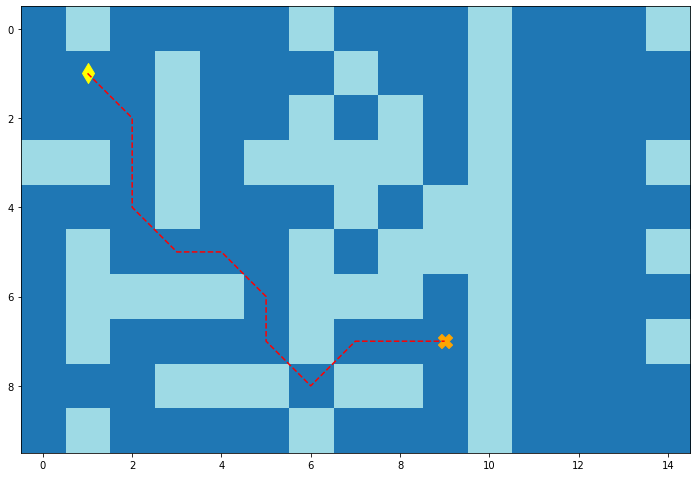

In [6]:
#------------ plot the path -------------

if(path != False):
  # Get coordinates for route
  x_path = []
  y_path = []

  for i in range(len(path)):
      x_path.append(path[i][0])
      y_path.append(path[i][1])

  # plot map and path

  fig, ax = plt.subplots(figsize=(12,12))
  ax.imshow(maze, cmap=plt.cm.tab20)
  ax.scatter(start[1],start[0], marker = "d", color = "yellow", s = 200)
  ax.scatter(end[1],end[0], marker = "X", color = "orange", s = 200)
  ax.plot(y_path,x_path, '--', color = "red")
  plt.show()